In [ ]:
#Grafico de linha Phee e Trill bb temperatura 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplcursors
import numpy as np
import calendar
from datetime import datetime

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df_agua['Data'] = pd.to_datetime(combined_df_agua['Data'], format='%d/%m/%y')
combined_df_bosque['Data'] = pd.to_datetime(combined_df_bosque['Data'], format='%d/%m/%y')

# Definindo os intervalos de tempo desejados como uma lista de tuplas (hora_inicio, hora_fim)
intervalos_tempo_agua = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

intervalos_tempo_bosque = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

# Função para converter string de hora para datetime.time
def str_to_time(time_str):
    return datetime.strptime(time_str, '%H:%M:%S').time()

# Converter intervalos de tempo para datetime.time
intervalos_tempo_agua = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_agua]
intervalos_tempo_bosque = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_bosque]

# Função para aplicar os filtros
def filtrar_dados(df, classificacao, intervalos_tempo, limite_tempo):
    dados_filtrados = pd.DataFrame()
    
    for hora_inicio, hora_fim in intervalos_tempo:
        filtro = (
            (df['Classificacao'] == classificacao) & 
            ((df['Hora'] >= hora_inicio) & (df['Hora'] <= hora_fim)) &
            (df['Tempototal'] > limite_tempo)
        )
        dados_filtrados = pd.concat([dados_filtrados, df[filtro]], ignore_index=True)
    
    return dados_filtrados

# Filtrando os dados para 'phee' e 'trill' da tabela Água
limite_tempo_phee = 0.0
filtered_data_phee_agua = filtrar_dados(combined_df_agua, 'phee bb', intervalos_tempo_agua, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_agua = filtrar_dados(combined_df_agua, 'trill bb', intervalos_tempo_agua, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_agua['Mês'] = filtered_data_phee_agua['Data'].dt.month
filtered_data_trill_agua['Mês'] = filtered_data_trill_agua['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_agua = filtered_data_phee_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_agua = filtered_data_trill_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Filtrando os dados para 'phee' e 'trill' da tabela Bosque
limite_tempo_phee = 0.0
filtered_data_phee_bosque = filtrar_dados(combined_df_bosque, 'phee bb', intervalos_tempo_bosque, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_bosque = filtrar_dados(combined_df_bosque, 'trill bb', intervalos_tempo_bosque, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_bosque['Mês'] = filtered_data_phee_bosque['Data'].dt.month
filtered_data_trill_bosque['Mês'] = filtered_data_trill_bosque['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_bosque = filtered_data_phee_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_bosque = filtered_data_trill_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Código para carregar os dados de temperatura
caminho_arquivo_temperatura = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Temperatura1.xlsx'
df_temperatura = pd.read_excel(caminho_arquivo_temperatura)
# Filtrar os dados com base nas condições de latitude, longitude e chuva não nula
filtro_temperatura = (df_temperatura['latitude'] == -5.5) & (df_temperatura['longitude'] == -37) & df_temperatura['Temperatura'].notna()

# Extrair apenas a parte da data da coluna 'DataHora'
df_temperatura['DataHora'] = pd.to_datetime(df_temperatura['DataHora'])
df_temperatura['Mês'] = df_temperatura['DataHora'].dt.to_period('M')

# Filtrando os dados de temperatura com base na latitude e longitude
filtered_temperatura = df_temperatura[filtro_temperatura].copy()

# Convertendo a coluna 'DataHora' para o formato de datetime
filtered_temperatura['DataHora'] = pd.to_datetime(filtered_temperatura['DataHora'], format='%d/%m/%y %H:%M')

# Extraindo apenas a parte do horário
filtered_temperatura['Hora'] = filtered_temperatura['DataHora'].dt.time

# Filtrando os dados de temperatura pelos mesmos horários de vocalização
filtered_temperatura = filtered_temperatura[((filtered_temperatura['Hora'] >= pd.to_datetime('4:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('12:00:00').time())) |
                                            ((filtered_temperatura['Hora'] >= pd.to_datetime('13:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('18:00:00').time()))]

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_temperatura['Mês'] = filtered_temperatura['DataHora'].dt.to_period('M')

# Convertendo a coluna 'Mês' para o formato de string e extraindo apenas o mês
filtered_temperatura['Mês'] = filtered_temperatura['Mês'].astype(str).str[-2:]

# Criando colunas separadas para Ano e Mês
filtered_temperatura['Ano'] = filtered_temperatura['DataHora'].dt.year

# Filtrando os dados para o intervalo de agosto de 2022 a julho de 2023
filtro_intervalo_tempo = (filtered_temperatura['DataHora'] >= '2022-08-01') & (filtered_temperatura['DataHora'] <= '2023-07-31')
filtered_temperatura = filtered_temperatura[filtro_intervalo_tempo]

# Calculando a média da temperatura por ano, mês e tabela
media_mensal_temperatura = filtered_temperatura.groupby(['Ano', 'Mês'])['Temperatura'].mean().reset_index()

# Ordenando o DataFrame pela coluna 'Mês'
media_mensal_temperatura = media_mensal_temperatura.sort_values(by='Mês')
# Ajustando os meses para começar de 1 novamente
media_mensal_temperatura['Mês'] = media_mensal_temperatura['Mês'].rank(method='dense').astype(int)


In [ ]:
nomes_meses = [calendar.month_abbr[i] for i in range(1, 13)]
sizefonte = 17
linhas = 2
colunas = 2
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : sizefonte}
plt.rc('font', **font)

fig = plt.figure(figsize=(15.00,10.00))
fig.subplots_adjust(left=0.05, bottom=0.09,
                    right=0.95, top=0.95, wspace=0.08, hspace=0.4)
# Gráfico para 'phee'
ax1 = plt.subplot2grid((linhas, colunas), (0, 0),colspan=2)
ax1.plot(media_mensal_phee_agua['Mês'],media_mensal_phee_agua['Tempototal'], marker='o', label='Água', color='blue')
ax1.plot(media_mensal_phee_bosque['Mês'],media_mensal_phee_bosque['Tempototal'], marker='o', label='Bosque', color='green')
ax1.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax1.set_title('Phee infante', size=sizefonte+2, weight="bold")
ax1.set_xticks(np.arange(1,13))
ax1.set_xlim([.5,12.5])
ax1.set_xticklabels( labels=nomes_meses, rotation=45)  # Configurando os ticks e labels


ax3 = ax1.twinx()
ax3.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Temperatura'], marker='o', label='Temperatura', color='black')
ax3.set_ylabel('Média Mensal da Temperatura', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
ax3.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
# ax3.tick_params(axis='y', labelcolor='k', size=sizefonte, weight="bold")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()


# # Gráfico para 'trill'
ax2 = plt.subplot2grid((linhas, colunas), (1, 0),colspan=2)
ax2.plot(media_mensal_trill_agua['Mês'],media_mensal_trill_agua['Tempototal'], marker='o', label='Água', color='blue')
ax2.plot(media_mensal_trill_bosque['Mês'],media_mensal_trill_bosque['Tempototal'], marker='o', label='Água', color='green')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax2.set_xlabel('Meses', size=sizefonte, weight="bold")
ax2.set_title('Trill infante',  size=sizefonte+2, weight="bold")
ax2.set_xticklabels( labels=nomes_meses, rotation=45)





ax4 = ax2.twinx()
ax4.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Temperatura'], marker='o', label='Temperatura', color='black')
ax4.set_ylabel('Média Mensal da Temperatura', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
ax4.tick_params(axis='y', labelcolor='k')
ax4.set_xticks(np.arange(1,13))
ax4.set_xlim([.5,12.5])


# Adicionar eixo y da direita para a média de temperatura para trill
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\linha_phee_trill bb_ano.png', bbox_inches='tight')

plt.show()


In [4]:
#Grafico de linha Phee e Trill adulto temperatura 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplcursors
import numpy as np
import calendar
from datetime import datetime

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df_agua['Data'] = pd.to_datetime(combined_df_agua['Data'], format='%d/%m/%y')
combined_df_bosque['Data'] = pd.to_datetime(combined_df_bosque['Data'], format='%d/%m/%y')

# Definindo os intervalos de tempo desejados como uma lista de tuplas (hora_inicio, hora_fim)
intervalos_tempo_agua = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

intervalos_tempo_bosque = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

# Função para converter string de hora para datetime.time
def str_to_time(time_str):
    return datetime.strptime(time_str, '%H:%M:%S').time()

# Converter intervalos de tempo para datetime.time
intervalos_tempo_agua = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_agua]
intervalos_tempo_bosque = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_bosque]

# Função para aplicar os filtros
def filtrar_dados(df, classificacao, intervalos_tempo, limite_tempo):
    dados_filtrados = pd.DataFrame()
    
    for hora_inicio, hora_fim in intervalos_tempo:
        filtro = (
            (df['Classificacao'] == classificacao) & 
            ((df['Hora'] >= hora_inicio) & (df['Hora'] <= hora_fim)) &
            (df['Tempototal'] > limite_tempo)
        )
        dados_filtrados = pd.concat([dados_filtrados, df[filtro]], ignore_index=True)
    
    return dados_filtrados

# Filtrando os dados para 'phee' e 'trill' da tabela Água
limite_tempo_phee = 0.0
filtered_data_phee_agua = filtrar_dados(combined_df_agua, 'phee adulto', intervalos_tempo_agua, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_agua = filtrar_dados(combined_df_agua, 'trill adulto', intervalos_tempo_agua, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_agua['Mês'] = filtered_data_phee_agua['Data'].dt.month
filtered_data_trill_agua['Mês'] = filtered_data_trill_agua['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_agua = filtered_data_phee_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_agua = filtered_data_trill_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Filtrando os dados para 'phee' e 'trill' da tabela Bosque
limite_tempo_phee = 0.0
filtered_data_phee_bosque = filtrar_dados(combined_df_bosque, 'phee adulto', intervalos_tempo_bosque, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_bosque = filtrar_dados(combined_df_bosque, 'trill adulto', intervalos_tempo_bosque, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_bosque['Mês'] = filtered_data_phee_bosque['Data'].dt.month
filtered_data_trill_bosque['Mês'] = filtered_data_trill_bosque['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_bosque = filtered_data_phee_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_bosque = filtered_data_trill_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Código para carregar os dados de temperatura
caminho_arquivo_temperatura = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Temperatura1.xlsx'
df_temperatura = pd.read_excel(caminho_arquivo_temperatura)
# Filtrar os dados com base nas condições de latitude, longitude e chuva não nula
filtro_temperatura = (df_temperatura['latitude'] == -5.5) & (df_temperatura['longitude'] == -37) & df_temperatura['Temperatura'].notna()

# Extrair apenas a parte da data da coluna 'DataHora'
df_temperatura['DataHora'] = pd.to_datetime(df_temperatura['DataHora'])
df_temperatura['Mês'] = df_temperatura['DataHora'].dt.to_period('M')

# Filtrando os dados de temperatura com base na latitude e longitude
filtered_temperatura = df_temperatura[filtro_temperatura].copy()

# Convertendo a coluna 'DataHora' para o formato de datetime
filtered_temperatura['DataHora'] = pd.to_datetime(filtered_temperatura['DataHora'], format='%d/%m/%y %H:%M')

# Extraindo apenas a parte do horário
filtered_temperatura['Hora'] = filtered_temperatura['DataHora'].dt.time

# Filtrando os dados de temperatura pelos mesmos horários de vocalização
filtered_temperatura = filtered_temperatura[((filtered_temperatura['Hora'] >= pd.to_datetime('4:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('12:00:00').time())) |
                                            ((filtered_temperatura['Hora'] >= pd.to_datetime('13:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('18:00:00').time()))]

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_temperatura['Mês'] = filtered_temperatura['DataHora'].dt.to_period('M')

# Convertendo a coluna 'Mês' para o formato de string e extraindo apenas o mês
filtered_temperatura['Mês'] = filtered_temperatura['Mês'].astype(str).str[-2:]

# Criando colunas separadas para Ano e Mês
filtered_temperatura['Ano'] = filtered_temperatura['DataHora'].dt.year

# Filtrando os dados para o intervalo de agosto de 2022 a julho de 2023
filtro_intervalo_tempo = (filtered_temperatura['DataHora'] >= '2022-08-01') & (filtered_temperatura['DataHora'] <= '2023-07-31')
filtered_temperatura = filtered_temperatura[filtro_intervalo_tempo]

# Calculando a média da temperatura por ano, mês e tabela
media_mensal_temperatura = filtered_temperatura.groupby(['Ano', 'Mês'])['Temperatura'].mean().reset_index()

# Ordenando o DataFrame pela coluna 'Mês'
media_mensal_temperatura = media_mensal_temperatura.sort_values(by='Mês')
# Ajustando os meses para começar de 1 novamente
media_mensal_temperatura['Mês'] = media_mensal_temperatura['Mês'].rank(method='dense').astype(int)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_14476\1925491826.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels( labels=nomes_meses, rotation=45)


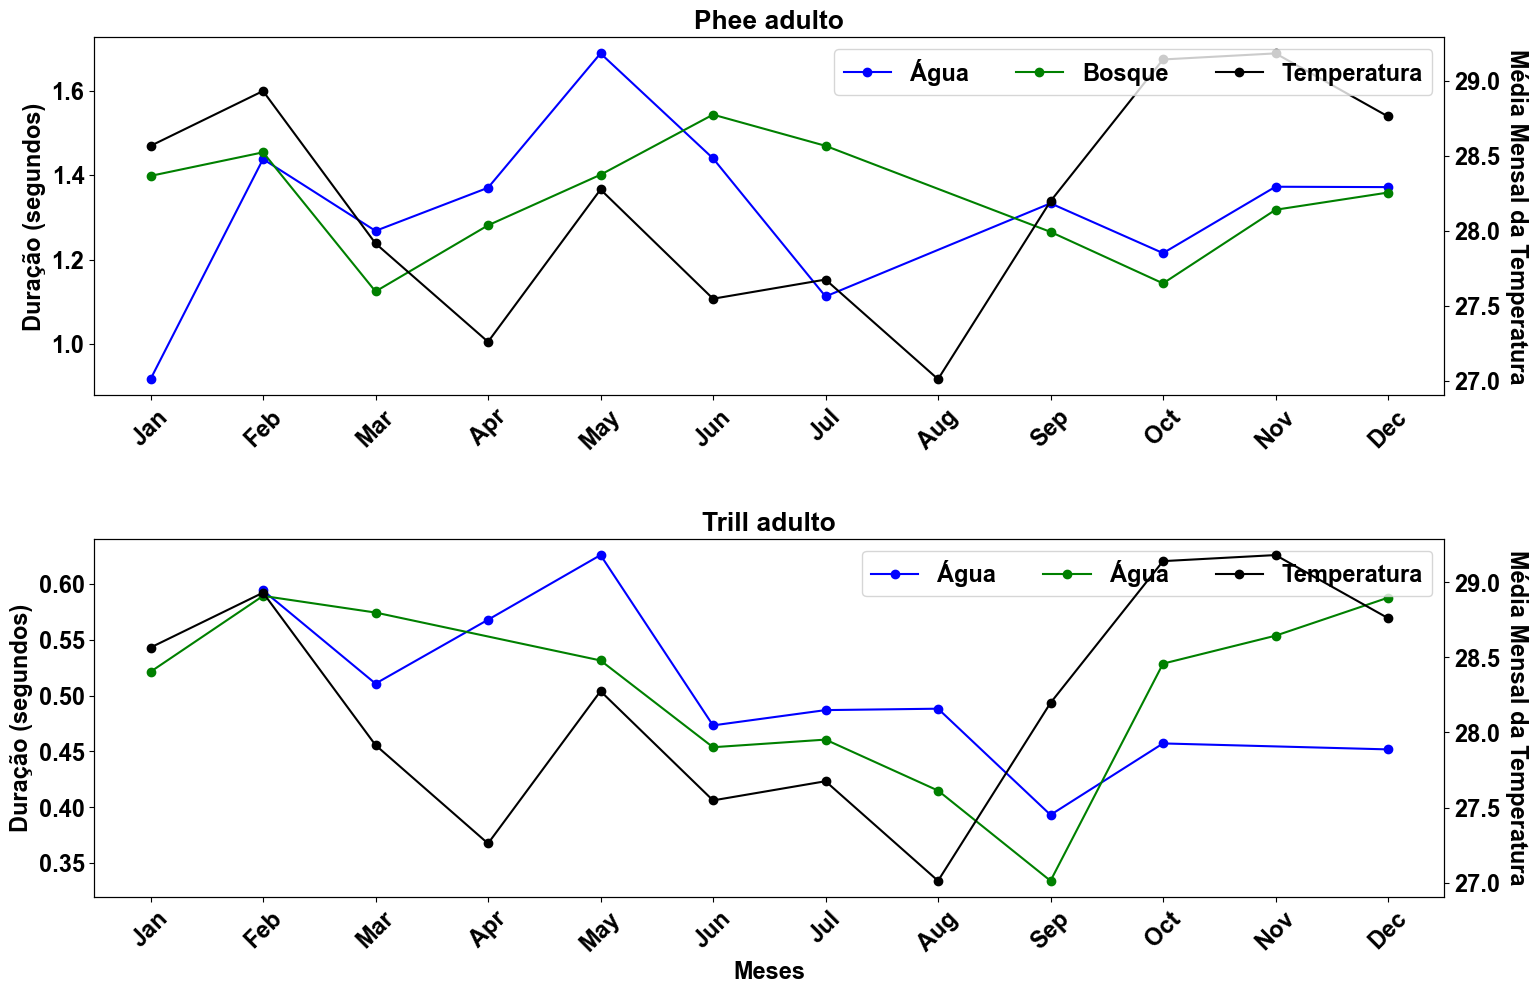

In [6]:
nomes_meses = [calendar.month_abbr[i] for i in range(1, 13)]
sizefonte = 17
linhas = 2
colunas = 2
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : sizefonte}
plt.rc('font', **font)

fig = plt.figure(figsize=(15.00,10.00))
fig.subplots_adjust(left=0.05, bottom=0.09,
                    right=0.95, top=0.95, wspace=0.08, hspace=0.4)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
# Gráfico para 'phee'
ax1 = plt.subplot2grid((linhas, colunas), (0, 0),colspan=2)
ax1.plot(media_mensal_phee_agua['Mês'],media_mensal_phee_agua['Tempototal'], marker='o', label='Água', color='blue')
ax1.plot(media_mensal_phee_bosque['Mês'],media_mensal_phee_bosque['Tempototal'], marker='o', label='Bosque', color='green')
ax1.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax1.set_title('Phee adulto', size=sizefonte+2, weight="bold")
ax1.set_xticks(np.arange(1,13))
ax1.set_xlim([.5,12.5])
ax1.set_xticklabels( labels=nomes_meses, rotation=45)  # Configurando os ticks e labels


ax3 = ax1.twinx()
ax3.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Temperatura'], marker='o', label='Temperatura', color='black')
ax3.set_ylabel('Média Mensal da Temperatura', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
ax3.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
# ax3.tick_params(axis='y', labelcolor='k', size=sizefonte, weight="bold")




# # Gráfico para 'trill'
ax2 = plt.subplot2grid((linhas, colunas), (1, 0),colspan=2)
ax2.plot(media_mensal_trill_agua['Mês'],media_mensal_trill_agua['Tempototal'], marker='o', label='Água', color='blue')
ax2.plot(media_mensal_trill_bosque['Mês'],media_mensal_trill_bosque['Tempototal'], marker='o', label='Água', color='green')
ax2.set_xlabel('Mês')
ax2.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax2.set_xlabel('Meses', size=sizefonte, weight="bold")
ax2.set_title('Trill adulto',  size=sizefonte+2, weight="bold")
ax2.set_xticklabels( labels=nomes_meses, rotation=45)





ax4 = ax2.twinx()
ax4.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Temperatura'], marker='o', label='Temperatura', color='black')
ax4.set_ylabel('Média Mensal da Temperatura', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
ax4.tick_params(axis='y', labelcolor='k')
ax4.set_xticks(np.arange(1,13))
ax4.set_xlim([.5,12.5])


# Adicionar eixo y da direita para a média de temperatura para trill
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\linha_phee_trill adulto_ano.png', bbox_inches='tight')
# 
plt.show()

In [ ]:
# Grafico de linha Phee e Trill adulto chuva
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplcursors
import numpy as np
import calendar
from datetime import datetime

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df_agua['Data'] = pd.to_datetime(combined_df_agua['Data'], format='%d/%m/%y')
combined_df_bosque['Data'] = pd.to_datetime(combined_df_bosque['Data'], format='%d/%m/%y')

# Definindo os intervalos de tempo desejados como uma lista de tuplas (hora_inicio, hora_fim)
intervalos_tempo_agua = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

intervalos_tempo_bosque = [
    ('04:00:00', '12:00:00'),
    ('13:00:00', '18:00:00')
]

# Função para converter string de hora para datetime.time
def str_to_time(time_str):
    return datetime.strptime(time_str, '%H:%M:%S').time()

# Converter intervalos de tempo para datetime.time
intervalos_tempo_agua = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_agua]
intervalos_tempo_bosque = [(str_to_time(inicio), str_to_time(fim)) for inicio, fim in intervalos_tempo_bosque]

# Função para aplicar os filtros
def filtrar_dados(df, classificacao, intervalos_tempo, limite_tempo):
    dados_filtrados = pd.DataFrame()
    
    for hora_inicio, hora_fim in intervalos_tempo:
        filtro = (
            (df['Classificacao'] == classificacao) & 
            ((df['Hora'] >= hora_inicio) & (df['Hora'] <= hora_fim)) &
            (df['Tempototal'] > limite_tempo)
        )
        dados_filtrados = pd.concat([dados_filtrados, df[filtro]], ignore_index=True)
    
    return dados_filtrados

# Filtrando os dados para 'phee' e 'trill' da tabela Água
limite_tempo_phee = 0.0
filtered_data_phee_agua = filtrar_dados(combined_df_agua, 'phee adulto', intervalos_tempo_agua, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_agua = filtrar_dados(combined_df_agua, 'trill adulto', intervalos_tempo_agua, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_agua['Mês'] = filtered_data_phee_agua['Data'].dt.month
filtered_data_trill_agua['Mês'] = filtered_data_trill_agua['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_agua = filtered_data_phee_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_agua = filtered_data_trill_agua.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Filtrando os dados para 'phee' e 'trill' da tabela Bosque
limite_tempo_phee = 0.0
filtered_data_phee_bosque = filtrar_dados(combined_df_bosque, 'phee adulto', intervalos_tempo_bosque, limite_tempo_phee)

limite_tempo_trill = 0.0
filtered_data_trill_bosque = filtrar_dados(combined_df_bosque, 'trill adulto', intervalos_tempo_bosque, limite_tempo_trill)

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_data_phee_bosque['Mês'] = filtered_data_phee_bosque['Data'].dt.month
filtered_data_trill_bosque['Mês'] = filtered_data_trill_bosque['Data'].dt.month

# Calculando a média do tempo das vocalizações na coluna Tempototal por mês e tabela
media_mensal_phee_bosque = filtered_data_phee_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()
media_mensal_trill_bosque = filtered_data_trill_bosque.groupby(['Tabela', 'Mês'])['Tempototal'].mean().reset_index()

# Código para carregar os dados de temperatura
caminho_arquivo_temperatura = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Temperatura1.xlsx'
df_temperatura = pd.read_excel(caminho_arquivo_temperatura)
# Filtrar os dados com base nas condições de latitude, longitude e chuva não nula
filtro_temperatura = (df_temperatura['latitude'] == -5.5) & (df_temperatura['longitude'] == -37) & df_temperatura['Chuva'].notna()

# Extrair apenas a parte da data da coluna 'DataHora'
df_temperatura['DataHora'] = pd.to_datetime(df_temperatura['DataHora'])
df_temperatura['Mês'] = df_temperatura['DataHora'].dt.to_period('M')

# Filtrando os dados de temperatura com base na latitude e longitude
filtered_temperatura = df_temperatura[filtro_temperatura].copy()

# Convertendo a coluna 'DataHora' para o formato de datetime
filtered_temperatura['DataHora'] = pd.to_datetime(filtered_temperatura['DataHora'], format='%d/%m/%y %H:%M')

# Extraindo apenas a parte do horário
filtered_temperatura['Hora'] = filtered_temperatura['DataHora'].dt.time

# Filtrando os dados de temperatura pelos mesmos horários de vocalização
filtered_temperatura = filtered_temperatura[((filtered_temperatura['Hora'] >= pd.to_datetime('4:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('12:00:00').time())) |
                                            ((filtered_temperatura['Hora'] >= pd.to_datetime('13:00:00').time()) &
                                             (filtered_temperatura['Hora'] <= pd.to_datetime('18:00:00').time()))]

# Criando uma coluna 'Mês' para armazenar o mês de cada data
filtered_temperatura['Mês'] = filtered_temperatura['DataHora'].dt.to_period('M')

# Convertendo a coluna 'Mês' para o formato de string e extraindo apenas o mês
filtered_temperatura['Mês'] = filtered_temperatura['Mês'].astype(str).str[-2:]

# Criando colunas separadas para Ano e Mês
filtered_temperatura['Ano'] = filtered_temperatura['DataHora'].dt.year

# Filtrando os dados para o intervalo de agosto de 2022 a julho de 2023
filtro_intervalo_tempo = (filtered_temperatura['DataHora'] >= '2022-08-01') & (filtered_temperatura['DataHora'] <= '2023-07-31')
filtered_temperatura = filtered_temperatura[filtro_intervalo_tempo]

# Calculando a média da temperatura por ano, mês e tabela
media_mensal_temperatura = filtered_temperatura.groupby(['Ano', 'Mês'])['Chuva'].mean().reset_index()

# Ordenando o DataFrame pela coluna 'Mês'
media_mensal_temperatura = media_mensal_temperatura.sort_values(by='Mês')
# Ajustando os meses para começar de 1 novamente
media_mensal_temperatura['Mês'] = media_mensal_temperatura['Mês'].rank(method='dense').astype(int)

In [ ]:
nomes_meses = [calendar.month_abbr[i] for i in range(1, 13)]
sizefonte = 17
linhas = 2
colunas = 2
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : sizefonte}
plt.rc('font', **font)

fig = plt.figure(figsize=(15.00,10.00))
fig.subplots_adjust(left=0.05, bottom=0.09,
	right=0.95, top=0.95,wspace=0.08, hspace=0.4)

# Gráfico para 'phee'
ax1 = plt.subplot2grid((linhas, colunas), (0, 0),colspan=2)
ax1.plot(media_mensal_phee_agua['Mês'],media_mensal_phee_agua['Tempototal'], marker='o', label='Água', color='blue')
ax1.plot(media_mensal_phee_bosque['Mês'],media_mensal_phee_bosque['Tempototal'], marker='o', label='Bosque', color='green')
ax1.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax1.set_title('Phee adulto', size=sizefonte+2, weight="bold")


ax3 = ax1.twinx()
ax3.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Chuva'], marker='o', label='Chuva', color='black')
ax3.set_ylabel('Média Mensal de chuva (mm/day)', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
# ax3.tick_params(axis='y', labelcolor='k', size=sizefonte, weight="bold")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
ax1.set_xticks(np.arange(1,13))
ax1.set_xlim([.5,12.5])
ax1.set_xticklabels( labels=nomes_meses, rotation=45)  # Configurando os ticks e labels

# # Gráfico para 'trill'
ax2 = plt.subplot2grid((linhas, colunas), (1, 0),colspan=2)
ax2.plot(media_mensal_trill_agua['Mês'],media_mensal_trill_agua['Tempototal'], marker='o', label='Água', color='blue')
ax2.plot(media_mensal_trill_bosque['Mês'],media_mensal_trill_bosque['Tempototal'], marker='o', label='Bosque', color='green')
ax2.set_xlabel('Meses',size=sizefonte, weight="bold")
ax2.set_ylabel('Duração (segundos)', size=sizefonte, weight="bold")
ax2.set_title('Trill adulto',  size=sizefonte+2, weight="bold")
ax2.set_xticklabels( labels=nomes_meses, rotation=45)





ax4 = ax2.twinx()
ax4.plot(media_mensal_temperatura['Mês'],media_mensal_temperatura['Chuva'], marker='o', label='Chuva', color='black')
ax4.set_ylabel('Média Mensal de chuva (mm/day)', color='black', rotation=-90,labelpad=20, size=sizefonte, weight="bold")
ax4.tick_params(axis='y', labelcolor='k')
ax4.set_xticks(np.arange(1,13))
ax4.set_xlim([.5,12.5])


# Adicionar eixo y da direita para a média de temperatura para trill
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1,ncol=3)
plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\linha_phee_trill_adulto_chuva.png', bbox_inches='tight')
# print(media_mensal_phee_bosque)
# print(media_mensal_temperatura)
plt.show()